* データマイニング特別演習
* 気象庁からダウンロードしたさいたま市の気温データを分析

In [1]:
# google colab の場合は以下のコメントアウトを外す
#!wget https://github.com/KHiraGit/sudspg_ds/raw/main/dm02_data_2025.zip
#!unzip -d data dm02_data_2025.zip

In [2]:
# 利用するライブラリをインポート
import os
import pandas as pd

In [3]:
csv_file = os.path.join('data', 'data-2025.csv') # 読み込むファイルを設定
df = pd.read_csv(csv_file, encoding='shift-jis') # CSVファイルの文字コードを指定して読み込む
df.head()

,,,ダウンロードした時刻：2025/10/01 02:59:19
NaN,さいたま,さいたま,さいたま
年月日時,気温(℃),気温(℃),気温(℃)
NaN,NaN,品質情報,均質番号
2025/7/1 1:00:00,26.2,8,1
2025/7/1 2:00:00,26.1,8,1


In [4]:
# 不要な行を省略したデータフレームを作成
csv_file = os.path.join('data', 'data-2025.csv') # 読み込むファイルを設定
df = pd.read_csv(csv_file, 
                 header=3, # 3行目までを無視、4行目を列名として設定
                 names=['年月日時', '気温', '品質情報', '均質番号'], # 列名を設定
                 encoding='shift-jis')
df['年月日時'] = pd.to_datetime(df['年月日時']) # '年月日時' を datetime型に変換
df.head()

,年月日時,気温,品質情報,均質番号
0,2025-07-01 01:00:00,26.2,8,1
1,2025-07-01 02:00:00,26.1,8,1
2,2025-07-01 03:00:00,26.1,8,1
3,2025-07-01 04:00:00,25.8,8,1
4,2025-07-01 05:00:00,26.0,8,1


<Axes: >

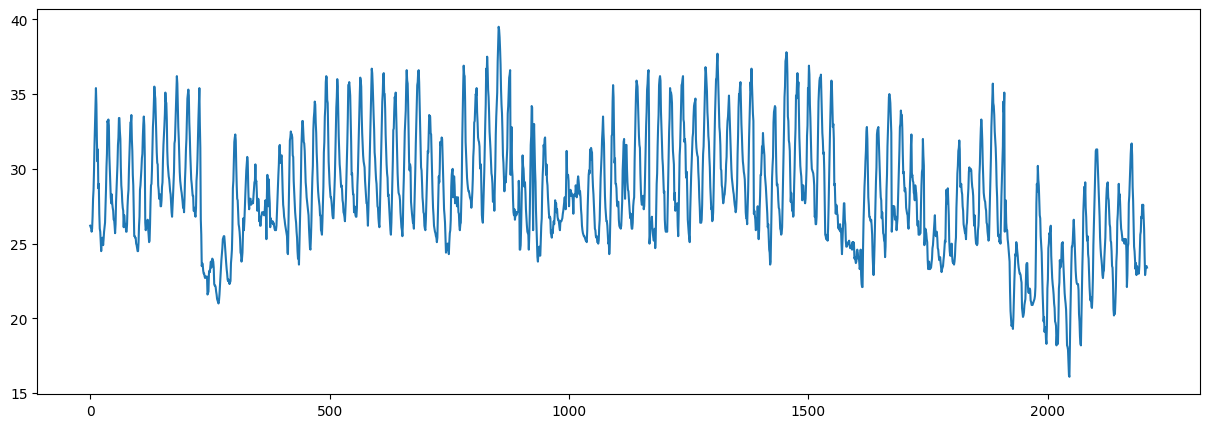

In [5]:
# 気温の折れ線グラフを作成
import matplotlib.pyplot as plt

df['気温'].plot(figsize=(15,5))

<Axes: >

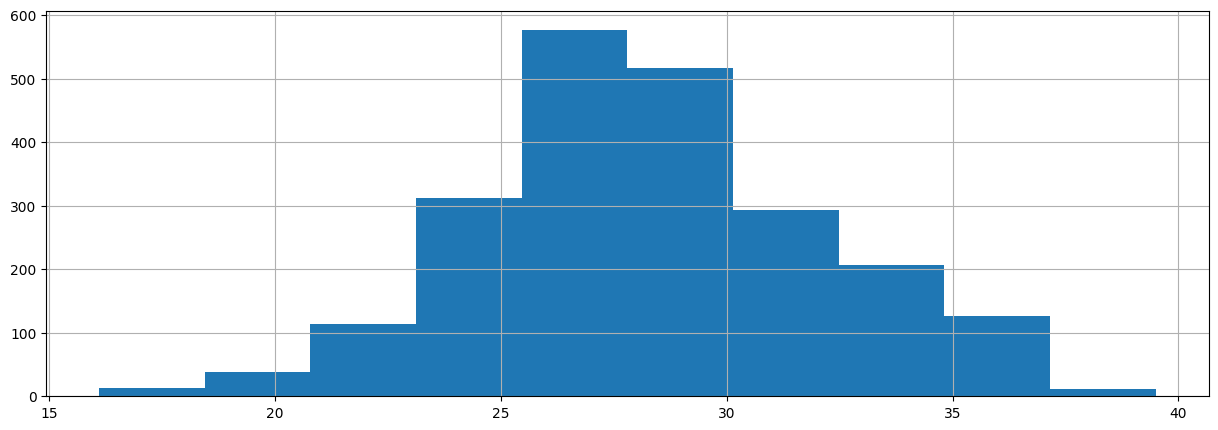

In [6]:
# 気温のヒストグラムを作成
df['気温'].hist(figsize=(15,5))

In [7]:
# 35度以上のデータを抽出
df_35 = df[df['気温'] >= 35] # 条件指定で抽出
print(len(df_35)) # df_35 の行数を表示
print(df_35.head(5)) # df_35 の先頭5行を表示

131
                   年月日時    気温  品質情報  均質番号
12  2025-07-01 13:00:00  35.4     8     1
134 2025-07-06 15:00:00  35.5     8     1
135 2025-07-06 16:00:00  35.0     8     1
157 2025-07-07 14:00:00  35.1     8     1
180 2025-07-08 13:00:00  35.2     8     1


In [8]:
import glob
import re

# glob 関数を使って dataフォルダの csvファイルのリストを作成 (年でソート)
files = sorted(glob.glob(os.path.join('data', '*.csv')))
for file in files: # リストのファイルを１つずつ順に処理
    print(file) # ファイル名を表示

data\data-2013.csv
data\data-2014.csv
data\data-2015.csv
data\data-2016.csv
data\data-2017.csv
data\data-2018.csv
data\data-2019.csv
data\data-2020.csv
data\data-2021.csv
data\data-2022.csv
data\data-2023.csv
data\data-2024.csv
data\data-2025.csv


data\data-2013.csv 2013 49
data\data-2014.csv 2014 38
data\data-2015.csv 2015 48
data\data-2016.csv 2016 11
data\data-2017.csv 2017 8
data\data-2018.csv 2018 90
data\data-2019.csv 2019 45
data\data-2020.csv 2020 47
data\data-2021.csv 2021 26
data\data-2022.csv 2022 51
data\data-2023.csv 2023 96
data\data-2024.csv 2024 90
data\data-2025.csv 2025 131


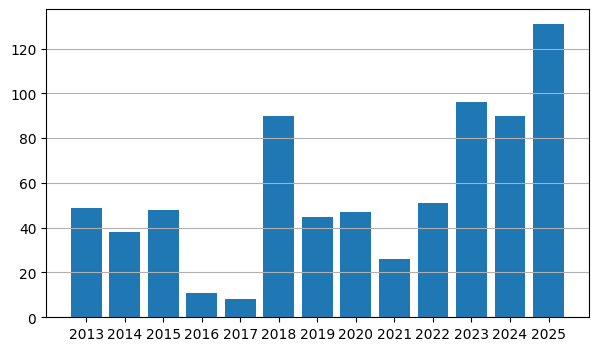

In [13]:
# 棒グラフ作成用のリストを準備 - 年ごとの状況
years = []
hours_35 = []
for file in files: # リストのファイルを１つずつ順に処理
    # ファイル名から 年 を抽出
    m = re.search(r'(\d\d\d\d)', file) # 数字が4つ連続する部分を抽出
    year = m.group(1)
    years.append(year)
    # 不要な行を省略したデータフレームを作成
    df = pd.read_csv(file, 
                    header=3, # 3行目までを無視、4行目を列名として設定
                    names=['年月日時', '気温', '品質情報', '均質番号'], # 列名を設定
                    encoding='shift-jis')
    # 35度以上のデータ数をリストに追加
    hour_35 = len(df[df['気温'] >= 35]) # 条件指定で抽出した日数
    hours_35.append(hour_35) # リストに追加
    # ファイル名、年、35度以上の日数を表示
    print(file, year, hour_35)
    
# 35度以上の日数の棒グラフを表示
plt.figure(figsize=(7,4)) # サイズを指定
plt.grid(axis='y') # 水平グリッド線を表示
plt.bar(years, hours_35) # 棒グラフを作成
plt.show() # グラフを表示

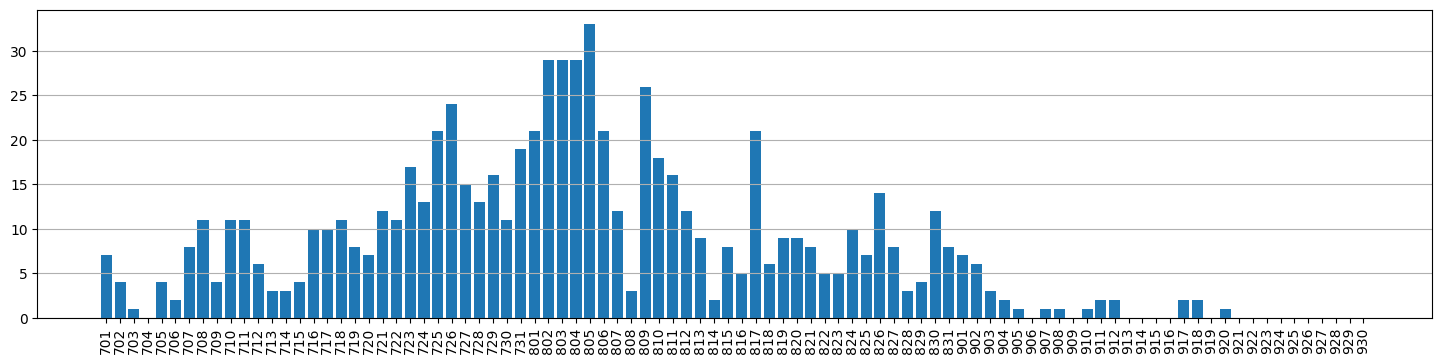

In [10]:
# 棒グラフ作成用のリストを準備 - 月日ごとの状況
df_hour = None # データフレーム用の変数を用意
for file in files: # リストのファイルを１つずつ順に処理
    # 不要な行を省略したデータフレームを作成
    df = pd.read_csv(file, 
                    header=3, # 3行目までを無視、4行目を列名として設定
                    names=['年月日時', '気温', '品質情報', '均質番号'],
                    encoding='shift-jis')
    df['年月日時'] = pd.to_datetime(df['年月日時']) # '年月日時' を datetime型に変換
    if df_hour is None: # データフレームが None だった場合はそのまま代入
        df_hour = df # データフレームが None だった場合は、CSVファイルから作成したデータフレームをそのまま代入
    else:
        df_hour = pd.concat([df_hour, df]) # CSVファイルから作成したデータフレームを df_hour に結合(追加)

dates = [] # 7月1日から9月30日までの日付 (x軸用)
dates_35 = [] # 7月1日から9月30日までの各日で35度以上のデータ数をカウント
for dd in range(1,32): # 7月
    dates.append(f'7{dd:02d}') # 指定された時刻で、35度以上のデータ数をカウント
    dates_35.append(len(df_hour[(df_hour['年月日時'].dt.month==7) & (df_hour['年月日時'].dt.day==dd) & (df_hour['気温'] >= 35)]))
for dd in range(1,32): # 8月
    dates.append(f'8{dd:02d}') # 指定された時刻で、35度以上のデータ数をカウント
    dates_35.append(len(df_hour[(df_hour['年月日時'].dt.month==8) & (df_hour['年月日時'].dt.day==dd) & (df_hour['気温'] >= 35)]))
for dd in range(1,31): # 9月
    dates.append(f'9{dd:02d}') # 指定された時刻で、35度以上のデータ数をカウント
    dates_35.append(len(df_hour[(df_hour['年月日時'].dt.month==9) & (df_hour['年月日時'].dt.day==dd) & (df_hour['気温'] >= 35)]))

# 各時間帯の35度以上のデータ数を棒グラフを表示
plt.figure(figsize=(18,4)) # サイズを指定
plt.grid(axis='y') # 水平グリッド線を表示
plt.bar(dates, dates_35) # 棒グラフを作成
plt.xticks(rotation=90) # x軸のラベルを縦書きに
plt.show() # グラフを表示

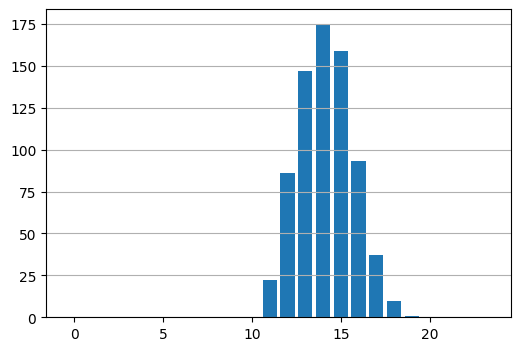

In [11]:
# 棒グラフ作成用のリストを準備 - 時間帯ごとの状況
df_hour = None # データフレーム用の変数を用意
for file in files: # リストのファイルを１つずつ順に処理
    # 不要な行を省略したデータフレームを作成
    df = pd.read_csv(file, 
                    header=3, # 3行目までを無視、4行目を列名として設定
                    names=['年月日時', '気温', '品質情報', '均質番号'],
                    encoding='shift-jis')
    df['年月日時'] = pd.to_datetime(df['年月日時']) # '年月日時' を datetime型に変換
    if df_hour is None: # データフレームが None だった場合はそのまま代入
        df_hour = df # データフレームが None だった場合は、CSVファイルから作成したデータフレームをそのまま代入
    else:
        df_hour = pd.concat([df_hour, df]) # CSVファイルから作成したデータフレームを df_hour に結合(追加)

hours = []
hours_35 = []
for hh in range(24):
    hours.append(hh) # 指定された時刻で、35度以上のデータ数をカウント
    hours_35.append(len(df_hour[(df_hour['年月日時'].dt.hour==hh) & (df_hour['気温'] >= 35)]))

# 各時間帯の35度以上のデータ数を棒グラフを表示
plt.figure(figsize=(6,4)) # サイズを指定
plt.grid(axis='y') # 水平グリッド線を表示
plt.bar(hours, hours_35) # 棒グラフを作成
plt.show() # グラフを表示

In [12]:
# 35度以上の継続時間を確認
import csv

high_35_dict = {}
for file in files: # リストのファイルを１つずつ順に処理
    with open(file, encoding='shift-jis') as f:
        reader = csv.reader(f)
        high_35 = 0
        for row in reader:
            if len(row) == 0 or not re.search(r'^\d\d\d\d', row[0]) or not re.search(r'^\d\d\.\d', row[1]):
                continue # 空行、データ行以外、欠損値の行はスキップ
            if float(row[1]) >= 35.0:
                high_35 = high_35 + 1
            elif high_35 > 0 and float(row[1]) < 35.0:
                high_35_dict[row[0]] = high_35 # 35度未満になった時刻とそれ以前の継続時間を辞書形式で記録
                high_35 = 0

sorted_dict = dict(sorted(high_35_dict.items(), key=lambda t: t[1], reverse=True))
for key in sorted_dict.keys():
    if sorted_dict[key] < 5: # 継続時間が5時間以上のデータを表示
        break
    else:
        print(key, sorted_dict[key])


2025/8/5 20:00:00 9
2018/7/23 19:00:00 8
2020/8/11 19:00:00 8
2022/8/2 19:00:00 8
2018/8/25 18:00:00 7
2018/8/26 19:00:00 7
2022/8/3 19:00:00 7
2023/7/16 19:00:00 7
2013/8/10 18:00:00 6
2014/8/5 18:00:00 6
2015/8/7 18:00:00 6
2018/7/22 18:00:00 6
2022/7/1 17:00:00 6
2022/7/31 19:00:00 6
2022/8/1 18:00:00 6
2023/7/10 18:00:00 6
2023/7/17 18:00:00 6
2023/7/18 18:00:00 6
2023/7/25 18:00:00 6
2023/7/26 18:00:00 6
2023/7/30 17:00:00 6
2023/8/4 18:00:00 6
2024/8/12 17:00:00 6
2024/8/13 18:00:00 6
2024/8/17 17:00:00 6
2025/8/24 18:00:00 6
2025/8/30 18:00:00 6
2025/9/2 17:00:00 6
2013/7/11 18:00:00 5
2013/8/11 16:00:00 5
2014/8/6 17:00:00 5
2015/7/26 18:00:00 5
2015/8/1 17:00:00 5
2015/8/6 17:00:00 5
2016/8/9 16:00:00 5
2018/7/18 17:00:00 5
2018/8/3 17:00:00 5
2018/8/5 17:00:00 5
2019/8/3 17:00:00 5
2019/8/17 17:00:00 5
2020/8/15 18:00:00 5
2021/8/10 16:00:00 5
2023/7/12 17:00:00 5
2023/7/27 17:00:00 5
2023/7/28 16:00:00 5
2023/7/31 16:00:00 5
2023/8/5 16:00:00 5
2024/7/7 19:00:00 5
2024/7/8 1